In [234]:
import numpy as np
import pandas as pd

In [235]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [236]:
# first 5 samples
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [237]:
# Random 10 samples
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4685,ham,But pls dont play in others life.,NaN,NaN,NaN
3772,ham,I came hostel. I m going to sleep. Plz call me...,NaN,NaN,NaN
3615,ham,Can you please ask macho what his price range ...,NaN,NaN,NaN
2418,ham,"Madam,regret disturbance.might receive a refer...",NaN,NaN,NaN
3050,ham,Awesome question with a cute answer: Someone a...,NaN,NaN,NaN
55,ham,Do you know what Mallika Sherawat did yesterda...,NaN,NaN,NaN
2106,ham,Thank you. I like you as well...,NaN,NaN,NaN
1987,ham,No calls..messages..missed calls,NaN,NaN,NaN
2711,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",NaN,NaN,NaN
1563,ham,Get ready to put on your excellent sub face :),NaN,NaN,NaN


In [238]:
df.shape

(5572, 5)

In [239]:
#Data cleaning 
# EDA
#Text preprocessing 
#Model building 
#Evaluation
#Improvement
#Website
#deploy

In [240]:
## Data Cleaing

# Data cleaning


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [242]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1)

In [243]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [244]:
df.rename(columns={"v1":"terget","v2":"sample"},inplace=True)

In [245]:
df

,terget,sample
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [246]:
# Converting the terget columns into numeric form
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['terget'] = label.fit_transform(df['terget'])


In [247]:
df

,terget,sample
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [248]:
df.isnull().sum()
# for missing rows 'df = df.dropna()'
# for missing columns 'df = df.dropna(axis=1)'

terget    0
sample    0
dtype: int64

In [249]:
df.duplicated().sum()

np.int64(403)

In [250]:
df = df.drop_duplicates()

In [251]:
df.duplicated().sum()


np.int64(0)

In [252]:
df.shape

(5169, 2)

# EDA

In [253]:
df.head()

,terget,sample
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [254]:
df['terget'].value_counts()

terget
0    4516
1     653
Name: count, dtype: int64

In [255]:
import matplotlib.pyplot as plt

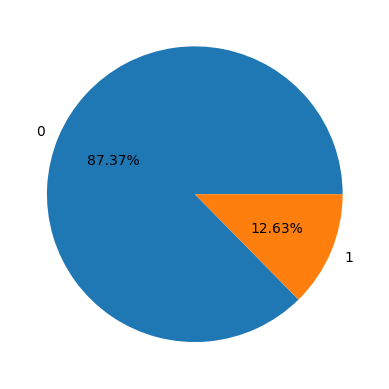

In [256]:
plt.pie(df['terget'].value_counts(), labels=df['terget'].value_counts().index, autopct="%0.2f%%")
plt.show()

In [257]:
# Data is imblanced



In [258]:
import nltk

In [259]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [260]:
df['num_chracters']=df['sample'].apply(len)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10936\2640702100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chracters']=df['sample'].apply(len)


In [261]:
from nltk.tokenize import word_tokenize

In [262]:

nltk.download("punkt")
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [263]:
df.head()

,terget,sample,num_chracters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [264]:
df['num_words'] = df['sample'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10936\1834041839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['sample'].apply(lambda x: len(nltk.word_tokenize(x)))


In [265]:
df

,terget,sample,num_chracters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [266]:
# number of sentences
df['num_sentences']=df['sample'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10936\2060460149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['sample'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [267]:
df

,terget,sample,num_chracters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [268]:
df.describe()

,terget,num_chracters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [269]:
df[df['terget']==0][['num_chracters','num_words','num_sentences']].describe()

,num_chracters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [270]:
df[df['terget']==1][['num_chracters','num_words','num_sentences']].describe()


,num_chracters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [271]:
import seaborn as sns


<Axes: xlabel='num_chracters', ylabel='Count'>

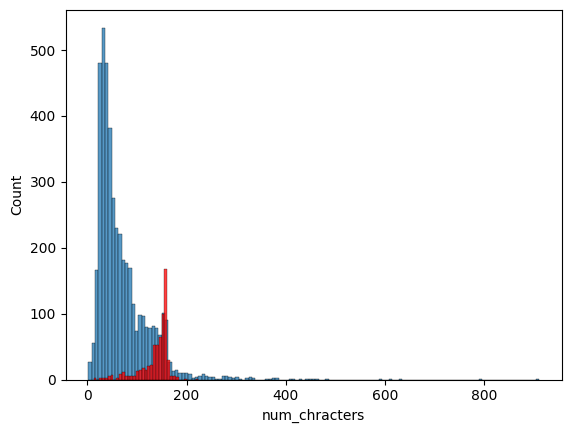

In [272]:
sns.histplot(df[df['terget']==0]['num_chracters'])
sns.histplot(df[df['terget']==1]['num_chracters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

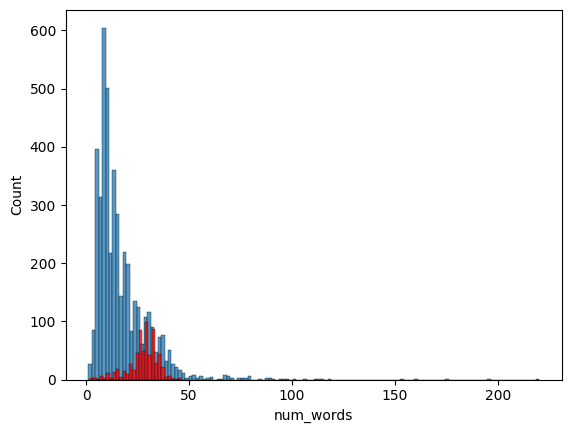

In [273]:
sns.histplot(df[df['terget']==0]['num_words'])
sns.histplot(df[df['terget']==1]['num_words'],color='red')

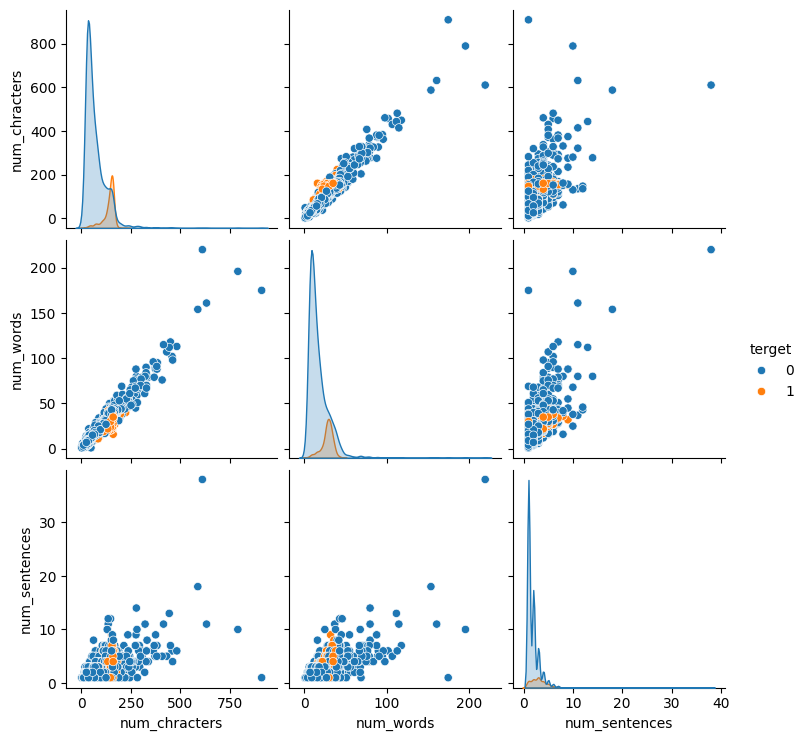

In [274]:
sns.pairplot(df,hue='terget')

<Axes: >

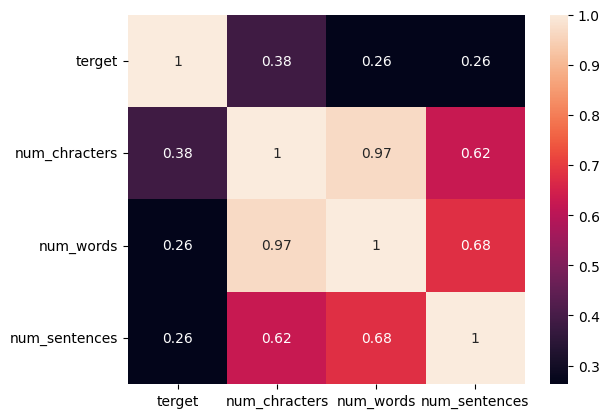

In [275]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# data preprocessing(text)

In [276]:
# Lower case
# Tokenization
# Removing special chracters
# Removing stop words and punctuation
# stemming

In [277]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [278]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [279]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [280]:
def transform_text(sample):
    sample = sample.lower()
    sample = nltk.word_tokenize(sample)

    y=[]
    for i in sample:
        if i.isalnum():
            y.append(i)

    sample = y[:]
    y.clear()

    for i in sample: 
        if i not in stopwords.words('english') and i not in  string.punctuation:
             y.append(i)

    sample = y[:]
    y.clear()

    for i in sample:
        y.append(ps.stem(i))

    return " ".join(y)


In [281]:
transform_text("Hi how are you ^^ $$ eging")

'hi ege'

In [282]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [283]:
df['tran_text']= df['sample'].apply(transform_text)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10936\3529984669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tran_text']= df['sample'].apply(transform_text)


In [284]:
df

,terget,sample,num_chracters,num_words,num_sentences,tran_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [285]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [286]:
import wordcloud

In [287]:
from wordcloud import WordCloud
wc = WordCloud(width= 500 ,height=500,min_font_size=10 , background_color = 'white')

In [288]:
spam_wc= wc.generate(df[df['terget']==1]['tran_text'].str.cat(sep=" "))

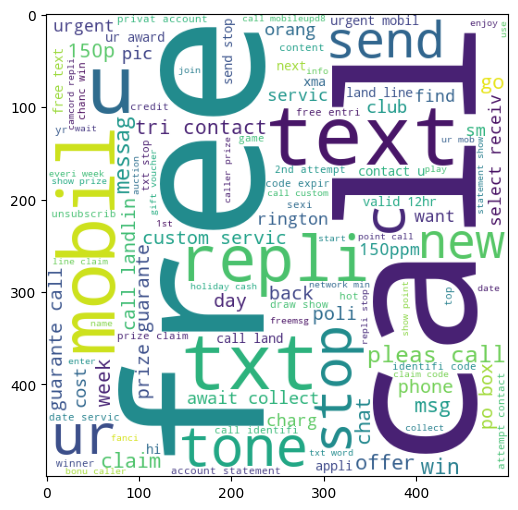

In [289]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [290]:
ham_wc= wc.generate(df[df['terget']==0]['tran_text'].str.cat(sep=" "))

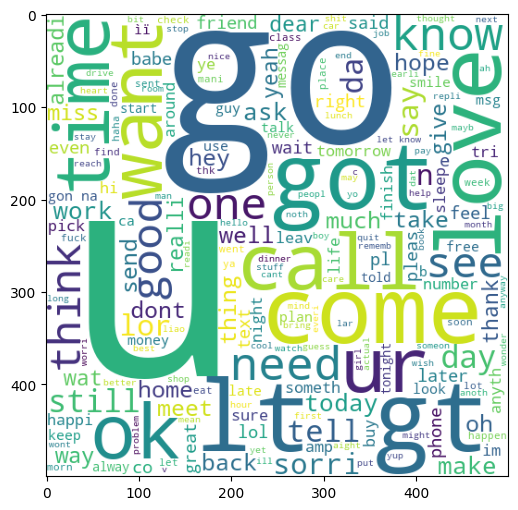

In [291]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [292]:
spam_corpus = []
for msg in df[df['terget']==1]['tran_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [293]:
len(spam_corpus)

9939

In [294]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [295]:
ham_corpus = []
for msg in df[df['terget']==0]['tran_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [296]:
len(ham_corpus)

35404

In [297]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [298]:
# model building 
# we will use navie baes first then other 
# Textual data navie bias gives best result . 

# Model building

In [299]:
df.head()

,terget,sample,num_chracters,num_words,num_sentences,tran_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [300]:
# As data is imblanced so accuracy doesn't matter . what is matte is presion_score . number of false positive .
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [301]:
X =tfidf.fit_transform(df['tran_text']).toarray()

In [302]:
X.shape

(5169, 6708)

In [303]:
y= df['terget'].values

In [304]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [305]:
from sklearn.model_selection import train_test_split


In [306]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=2)

In [308]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [309]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [310]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [311]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [225]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [314]:
pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 578.7 kB/s eta 0:01:38
   ---------------------------------------- 0.5/56.8 MB 578.7 kB/s eta 0:01:38
    --------------------------------------- 0.8/56.8 MB 568.6 kB/s eta 0:01:39
    --------------------------------------- 0.8/56.8 MB 568.6 kB/s eta 0:01:39
    --------------------------------------- 0.8/56.8 MB 568.6 kB/s eta 0:01:39
    --------------------------------------- 1.0/56.8 MB 519.1 kB/s eta 0:01:48
    --------------------------------------- 1.0/56.8 MB 519.1 kB/s eta 0:01:48
    -----------------------

In [315]:
# As we can see the tfidf mnb give the best output . so we will choose that. tfidf--->MNB
# now try other classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [320]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [322]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbc,
    'xgb' : xgb

}


In [325]:
def train_classifier (clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy , precision

In [326]:
accuracy_scores =[]
precision_scores =[]

for name , clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ", name)
    print ("Accuracy  -", current_accuracy)
    print ( "Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy  - 0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy  - 0.9003868471953579
Precision -  1.0
For  NB
Accuracy  - 0.9593810444874274
Precision -  1.0
For  DT
Accuracy  - 0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy  - 0.9516441005802708
Precision -  0.94
For  RF
Accuracy  - 0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy  - 0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy  - 0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy  - 0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy  - 0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy  - 0.9748549323017408
Precision -  0.9516129032258065


In [327]:
# model improvements (Do the change and compare the accuracy and presion)
# 1. use specific max featurs
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
# when we vectorize the text we take all the unqie word. instead trying to take specific most frequency words . to do that . 
# tfidf = TfidfVectorizer(max_features = 3000) you can try this out 
# 2. using scaller in X
# from sklearn.preprocessing import MinMaxScaler (give all +ve )
# 3. Let add Num_characters



In [328]:
# 4. apply voting classfier.
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [338]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('RF' , rfc)],voting='hard')

In [339]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [340]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
# as you can see this give better result that Random Forest

Accuracy 0.9729206963249516
Precision 1.0


In [332]:
# Applying stacking( similar to voting classifier)
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [333]:
from sklearn.ensemble import StackingClassifier

In [334]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [335]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [343]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))